<a href="https://colab.research.google.com/github/profshai/regression-models/blob/main/kaggle_bike_demand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Demand Prediction

We will use the multiple regression model to predict the demand for Bike.

Data comes from the UCL Machine Learning repository with 17389 samples containing hourly and daily counts of rental bikes between 2011 and 2012. The dataset has 16 features including:

1. Season (Spring-1, Summer-2, Fall-3, and Winter-4)
2. Holiday (Yes-1, No-0)
3. Weekday (Sunday to Saturday 0-6)
4. Working day (Yes-1, No-0)
5. Weather (Clear -1, Mist-2, Light snow/rain-3, Heavy rain/snow-4)
6. Temperature
7. Feels like temperature (atemp)
7. Humidity
8. Windspeed

### Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Import dataset

In [5]:
data = pd.read_csv('hour.csv')
data

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Preliminary Data Analysis

In [7]:
# 'casual' + 'registered' = 'demand' so we drop those two columns
df = data.copy()
df = df.drop(['index', 'date', 'casual', 'registered'], axis = 1)
df

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [8]:
#Checking for missing values
df.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

### Data Visualization

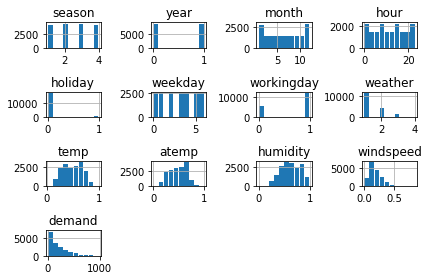

In [10]:
df.hist(rwidth=0.9)
plt.tight_layout()

We see that the 'demand' variable (dependent variable) is not normally distributed.

#### Visualize the continuous features against the demand (dependent variables)

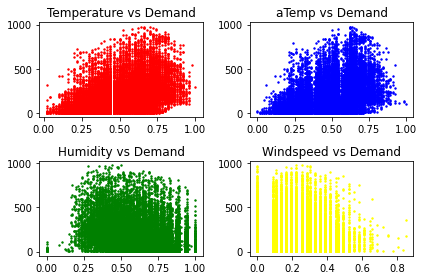

In [15]:
plt.subplot(2,2,1)
plt.title('Temperature vs Demand')
plt.scatter(df['temp'], df['demand'], s=2, c='red')

plt.subplot(2,2,2)
plt.title('aTemp vs Demand')
plt.scatter(df['atemp'], df['demand'], s=2, c='blue')

plt.subplot(2,2,3)
plt.title('Humidity vs Demand')
plt.scatter(df['humidity'], df['demand'], s=2, c='green')

plt.subplot(2,2,4)
plt.title('Windspeed vs Demand')
plt.scatter(df['windspeed'], df['demand'], s=2, c='yellow')
plt.tight_layout()
plt.show()


There appears to be a high correlation between temp and atemp.

#### Average demand graphs

In [37]:
# colors = ['g', 'r', 'm', 'b']

# plt.subplot(4,2,1)
# plt.title('Average Demand per season')
# sea = df['season'].unique()
# average_demand = df.groupby('season').mean()['demand']
# plt.bar(sea, average_demand, color = colors)

# plt.subplot(4,2,2)
# plt.title('Average Demand per holiday')
# sea = df['holiday'].unique()
# average_demand = df.groupby('holiday').mean()['demand']
# plt.bar(sea, average_demand, color = colors)

# plt.subplot(4,2,3)
# plt.title('Average Demand per month')
# sea = df['month'].unique()
# average_demand = df.groupby('month').mean()['demand']
# plt.bar(sea, average_demand, color = colors)

# plt.subplot(4,2,4)
# plt.title('Average Demand per hour')
# sea = df['hour'].unique()
# average_demand = df.groupby('hour').mean()['demand']
# plt.bar(sea, average_demand, color = colors)

# plt.subplot(4,2,5)
# plt.title('Average Demand per weather')
# sea = df['weather'].unique()
# average_demand = df.groupby('weather').mean()['demand']
# plt.bar(sea, average_demand, color = colors)

# plt.subplot(4,2,6)
# plt.title('Average Demand per weekday')
# sea = df['weekday'].unique()
# average_demand = df.groupby('weekday').mean()['demand']
# plt.bar(sea, average_demand, color = colors)

# plt.subplot(4,2,7)
# plt.title('Average Demand per workingday')
# sea = df['workingday'].unique()
# average_demand = df.groupby('workingday').mean()['demand']
# plt.bar(sea, average_demand, color = colors)

# plt.subplot(4,2,8)
# plt.title('Average Demand per year')
# sea = df['year'].unique()
# average_demand = df.groupby('year').mean()['demand']
# plt.bar(sea, average_demand, color = colors)

# plt.tight_layout()
# plt.show()


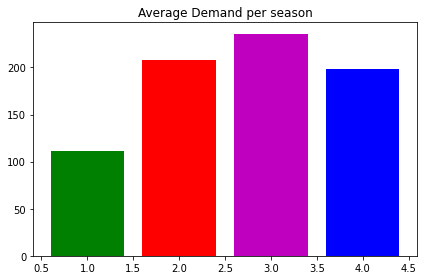

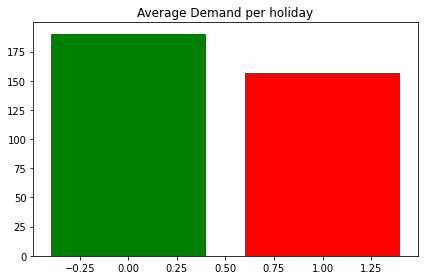

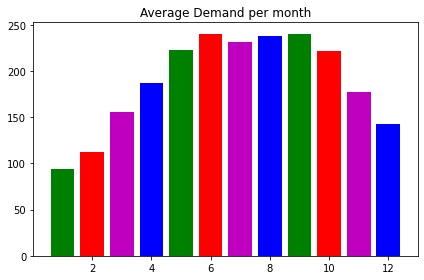

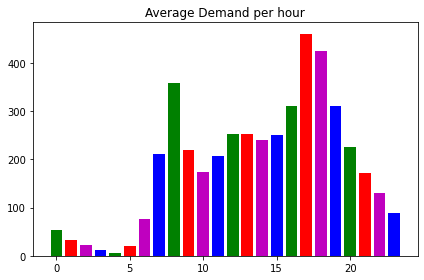

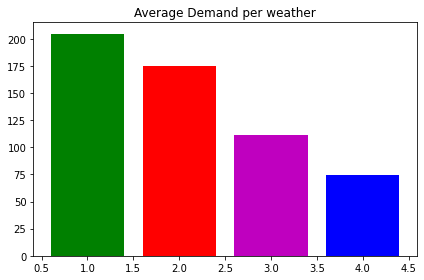

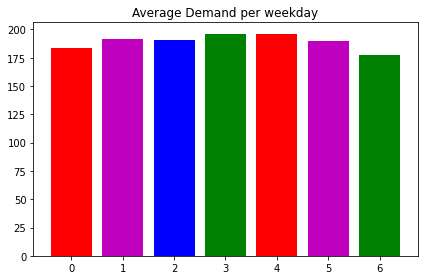

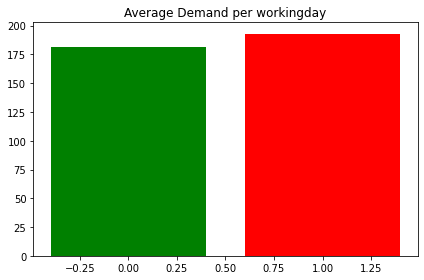

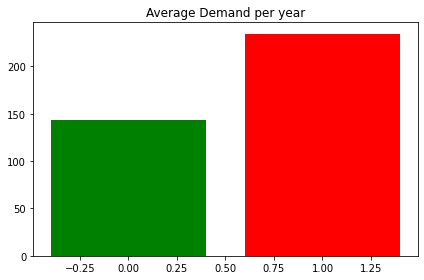

In [38]:
def graph(hello):
  colors = ['g', 'r', 'm', 'b']
  plt.title(f'Average Demand per {hello}')
  sea = df[f'{hello}'].unique()
  average_demand = df.groupby(f'{hello}').mean()['demand']
  plt.bar(sea, average_demand, color = colors)
  plt.tight_layout()
  plt.show()

graph('season')
graph('holiday')
graph('month')
graph('hour')
graph('weather')
graph('weekday')
graph('workingday')
graph('year')


Based on the graphs above, we will drop 'weekday', 'workingday' and 'year'.

#### Check for outliers

In [39]:
df.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [40]:
# Check the demand variable for outliers
df['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

### Checking the linear regression Assumptions

#### Multicollinearity

In [42]:
correlation = df[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
correlation

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


We shall drop 'atemp' because it has a strong correlation with 'temp'.
 
We shall also drop 'windspeed' because it has low correlation with 'demand'

In [43]:
df = df.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)
df

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1
...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,119
17375,1,12,20,0,2,0.26,0.60,89
17376,1,12,21,0,1,0.26,0.60,90
17377,1,12,22,0,1,0.26,0.56,61


#### Autocorrelation

Variables must be of type: float, not integer.

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474795, 0.47049642, 0.49622893, 0.49404147, 0.46796018,
        0.47732133, 0.5267586 , 0.59145856, 0.65201694, 0.7151968 ,
        0.8059117 , 0.9253113 , 1.        , 0.9253113 , 0.8059117 ,
        0.7151968 , 0.65201694, 0.59145856, 0.5267586 , 0.47732133,
        0.46796018, 0.49404147, 0.49622893, 0.47049642, 0.45474795],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x7f38283bcdd0>)

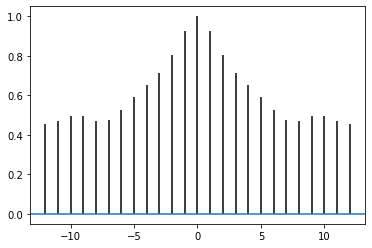

In [44]:
df1 = pd.to_numeric(df['demand'], downcast='float')
plt.acorr(df1, maxlags=12)

There is high autocorrelation of up to 5 previous values

#### Normality assumption

We will solve the non-normality distribution problem of the 'demand' variable by taking the log.

Text(0.5, 1.0, 'Normal distribution')

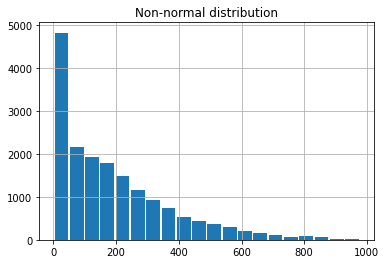

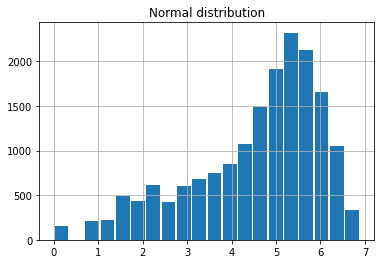

In [46]:
df1 = df['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)
plt.title('Non-normal distribution')

plt.figure()
df2.hist(rwidth=0.9, bins=20)
plt.title('Normal distribution')

In [47]:
df['demand'] = np.log(df['demand'])

Let's now solve the autocorrelation problem

In [48]:
t_1 = df['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']

t_2 = df['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']

t_3 = df['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']

df_lag = pd.concat([df, t_1, t_2, t_3], axis=1)
df_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [49]:
df_lag = df_lag.dropna()
df_lag

,season,month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


### Encoding variables

We will create dummy variables

In [50]:
df_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

We have to change the data types of the categorical variables to strings.

In [ ]:
df_lag['season'] = df_lag['season'].astype('category')
df_lag['holiday'] = df_lag['holiday'].astype('category')
df_lag['weather'] = df_lag['weather'].astype('category')
df_lag['month'] = df_lag['month'].astype('category')
df_lag['hour'] = df_lag['hour'].astype('category')

In [57]:
df_lag.dtypes

season      category
month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [58]:
# We want to remove the first level to have (k-1) variables...To avoid the dummy variable trap
dummy_df = pd.get_dummies(df_lag, drop_first = True)
dummy_df

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Split Data into training and test data

In [59]:
X = dummy_df.drop(['demand'], axis=1)
y = dummy_df[['demand']]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Train the model

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predict result

In [78]:
y_pred = regressor.predict(X_test)

### Check model performance

#### R-Squared

In [80]:
r_2 = regressor.score(X_test, y_test)
r_2

0.9203778580074727

#### RMSE

In [82]:
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.41364245292666557